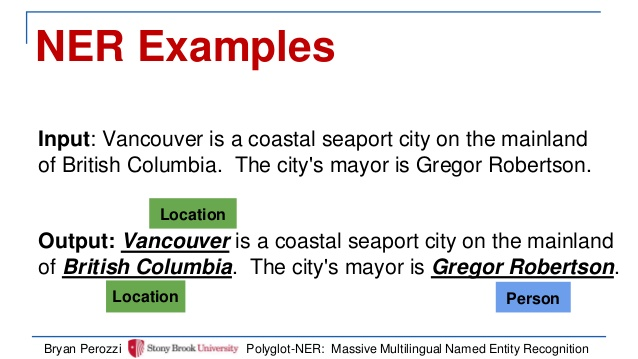

In [1]:
#What is a named entity?
from IPython.display import Image
Image(filename='ner.png') 

## Training a NE Parser

## 1 . Train using grammar rules yourself and extract noun phrases 

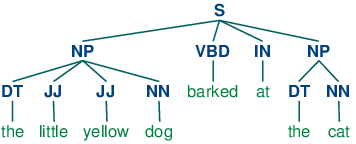

In [122]:
Image(filename='nltkpos.png') 

In [1]:
#USe grammar 
import nltk	
grammar = r"""
  NP:   {<NNP>+}                # chunk sequences of proper nouns eg: Abraham Lincoln u
"""
cp = nltk.RegexpParser(grammar)

In [2]:
sentence = 'I have never been to New York City! The plaza is located out there '
for tree in cp.parse(nltk.pos_tag(nltk.word_tokenize(sentence))):
    print tree 

('I', 'PRP')
('have', 'VBP')
('never', 'RB')
('been', 'VBN')
('to', 'TO')
(NP New/NNP York/NNP City/NNP)
('!', '.')
('The', 'DT')
('plaza', 'NN')
('is', 'VBZ')
('located', 'VBN')
('out', 'IN')
('there', 'RB')


In [20]:
cp.parse(nltk.pos_tag(nltk.word_tokenize(sentence))).draw()

In [4]:
contentArray =['Starbucks  is not doing very well lately.',
               'Overall, while it may seem there is already a Starbucks on every corner',\
               'Starbucks still has a lot of room to grow.']
for sentence in contentArray:
    print sentence 
    for tree in cp.parse(nltk.pos_tag(nltk.word_tokenize(sentence))):
        print tree 
    print 

Starbucks  is not doing very well lately.
('Starbucks', 'NNS')
('is', 'VBZ')
('not', 'RB')
('doing', 'VBG')
('very', 'RB')
('well', 'RB')
('lately', 'RB')
('.', '.')

Overall, while it may seem there is already a Starbucks on every corner
('Overall', 'JJ')
(',', ',')
('while', 'IN')
('it', 'PRP')
('may', 'MD')
('seem', 'VB')
('there', 'EX')
('is', 'VBZ')
('already', 'RB')
('a', 'DT')
('Starbucks', 'NNS')
('on', 'IN')
('every', 'DT')
('corner', 'NN')

Starbucks still has a lot of room to grow.
('Starbucks', 'NNS')
('still', 'RB')
('has', 'VBZ')
('a', 'DT')
('lot', 'NN')
('of', 'IN')
('room', 'NN')
('to', 'TO')
('grow', 'VB')
('.', '.')



## 2. Use nltk's grammar rules and extract named entity

In [5]:
# Obtain different types of named entities
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\rshars\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\rshars\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [110]:
#Create a NER parser 
import nltk
import re
import time
 
 
contentArray =['Starbucks is not doing very well lately.',
               'Overall, while it may seem there is already a Starbucks on every corner',\
               'Starbucks still has a lot of room to grow.',
               'They just began expansion into food products, which has been going quite well\
               so far for them.',
               'I can attest that my own expenditure when going to Starbucks has increased,\
               in lieu of these food products.',
               'Starbucks is also indeed expanding their number of stores as well.',
               'Starbucks still sees strong sales growth here in the united states, and\
               intends to actually continue increasing this.',
               'Starbucks also has one of the more successful loyalty programs, which \
               accounts for 30%  of all transactions being loyalty-program-based.',
               'As if news could not get any more positive for the company, Brazilian weather\
               has become ideal for producing coffee beans.',
               'Brazil is the world\'s #1 coffee producer, the source of about 1/3rd of the \
               entire world\'s supply!',
               'Given the dry weather, coffee farmers have amped up production, to take as\
               much of an advantage as possible with the dry weather.',
               'Increase in supply... well you know the rules...',]
 
def processLanguage(item):
    try: 
        tokenized = nltk.word_tokenize(item)
        tagged = nltk.pos_tag(tokenized)
        namedEnt = nltk.ne_chunk(tagged) 
        return namedEnt
    except Exception, e:
        print str(e)

In [111]:
for sentence in contentArray:
    print sentence
    for tagged_tree in processLanguage(sentence):
        print tagged_tree
    print 

Starbucks is not doing very well lately.
('Starbucks', 'NNS')
('is', 'VBZ')
('not', 'RB')
('doing', 'VBG')
('very', 'RB')
('well', 'RB')
('lately', 'RB')
('.', '.')

Overall, while it may seem there is already a Starbucks on every corner
(GPE Overall/JJ)
(',', ',')
('while', 'IN')
('it', 'PRP')
('may', 'MD')
('seem', 'VB')
('there', 'EX')
('is', 'VBZ')
('already', 'RB')
('a', 'DT')
('Starbucks', 'NNS')
('on', 'IN')
('every', 'DT')
('corner', 'NN')

Starbucks still has a lot of room to grow.
('Starbucks', 'NNS')
('still', 'RB')
('has', 'VBZ')
('a', 'DT')
('lot', 'NN')
('of', 'IN')
('room', 'NN')
('to', 'TO')
('grow', 'VB')
('.', '.')

They just began expansion into food products, which has been going quite well               so far for them.
('They', 'PRP')
('just', 'RB')
('began', 'VBD')
('expansion', 'NN')
('into', 'IN')
('food', 'NN')
('products', 'NNS')
(',', ',')
('which', 'WDT')
('has', 'VBZ')
('been', 'VBN')
('going', 'VBG')
('quite', 'RB')
('well', 'RB')
('so', 'RB')
('far', 'RB

In [105]:
for tree in processLanguage('NYC is a great place'):
    print tree

(ORGANIZATION NYC/NNP)
('is', 'VBZ')
('a', 'DT')
('great', 'JJ')
('place', 'NN')


In [104]:
for tree in processLanguage(contentArray[3]):
    print tree
    

('I', 'PRP')
('can', 'MD')
('attest', 'VB')
('that', 'IN')
('my', 'PRP$')
('own', 'JJ')
('expenditure', 'NN')
('when', 'WRB')
('going', 'VBG')
('to', 'TO')
(PERSON Starbucks/NNP)
('has', 'VBZ')
('increased', 'VBN')
(',', ',')
('in', 'IN')
('lieu', 'NN')
('of', 'IN')
('these', 'DT')
('food', 'NN')
('products', 'NNS')
('.', '.')


## 3 . Training a NE classifier using custom features and custom data

### Lets have a look at the data 

In [21]:
import os
import collections
 
ner_tags = collections.Counter()
 
corpus_root = "gmb-1.0.0"   #Path of the unzipped corpus 
 
for root, dirs, files in os.walk(corpus_root):
    for filename in files:
        if filename.endswith(".tags"):
            with open(os.path.join(root, filename), 'rb') as file_handle:
                file_content = file_handle.read().decode('utf-8').strip()
                annotated_sentences = file_content.split('\n\n')   # Split sentences

                for annotated_sentence in annotated_sentences:
                    annotated_tokens = [seq for seq in annotated_sentence.split('\n') if seq]  # Split words
                    standard_form_tokens = []
 
                    for idx, annotated_token in enumerate(annotated_tokens):
                        annotations = annotated_token.split('\t')   # Split annotations
                        word, tag, ner = annotations[0], annotations[1], annotations[-1]
                        if ner!='O':
                            ner = ner.split('-')[1] #worry only about the main category 
                        ner_tags[ner] += 1


In [22]:
print ner_tags #count of each tags after cleaning 

Counter({u'O': 70096, u'LOC': 3957, u'ORG': 3104, u'DAT': 2985, u'PER': 2033, u'MON': 327, u'PCT': 116, u'TIM': 103, u'TTL': 5, u'ART': 2})


### Feature building 

In [11]:
import string
from nltk.stem.snowball import SnowballStemmer
 
 
def features(tokens, index, history):
    """
    `tokens`  = a POS-tagged sentence [(w1, t1), ...]
    `index`   = the index of the token we want to extract features for
    `history` = the previous predicted IOB tags
    """
 
    # init the stemmer
    stemmer = SnowballStemmer('english')
 
    # Pad the sequence with placeholders
    tokens = [('[START2]', '[START2]'), ('[START1]', '[START1]')] + list(tokens) + [('[END1]', '[END1]'), ('[END2]', '[END2]')]
    history = ['[START2]', '[START1]'] + list(history)
 
    # shift the index with 2, to accommodate the padding
    index += 2
 
    word, pos = tokens[index]
    allcaps = word == word.capitalize()
    
    return {
        'word': word,
        'lemma': stemmer.stem(word),
        'pos': pos,
        'all-caps': allcaps
    }

In [23]:
def read_gmb(corpus_root):
    for root, dirs, files in os.walk(corpus_root):
        for filename in files:
            if filename.endswith(".tags"):
                with open(os.path.join(root, filename), 'rb') as file_handle:
                    file_content = file_handle.read().decode('utf-8').strip()
                    annotated_sentences = file_content.split('\n\n')
                    for annotated_sentence in annotated_sentences:
                        annotated_tokens = [seq for seq in annotated_sentence.split('\n') if seq]
 
                        standard_form_tokens = []
 
                        for idx, annotated_token in enumerate(annotated_tokens):
                            annotations = annotated_token.split('\t')
                            word, tag, ner = annotations[0], annotations[1], annotations[-1]
 
                            standard_form_tokens.append(((word, tag), ner))
 
                           
                        yield standard_form_tokens
 

In [24]:
reader = read_gmb('gmb-1.0.0/')

In [25]:
reader.next()

[((u'Suspected', u'JJ'), u'O'),
 ((u'Islamist', u'JJ'), u'O'),
 ((u'rebels', u'NNS'), u'O'),
 ((u'have', u'VBP'), u'O'),
 ((u'fired', u'VBN'), u'O'),
 ((u'mortar', u'NN'), u'O'),
 ((u'shells', u'NNS'), u'O'),
 ((u'at', u'IN'), u'O'),
 ((u'the', u'DT'), u'O'),
 ((u'palace', u'NN'), u'O'),
 ((u'used', u'VBN'), u'O'),
 ((u'by', u'IN'), u'O'),
 ((u'Somalia', u'NNP'), u'I-LOC'),
 ((u"'s", u'POS'), u'O'),
 ((u'interim', u'JJ'), u'O'),
 ((u'President', u'NNP'), u'O'),
 ((u'Abdullahi', u'NNP'), u'O'),
 ((u'Yusuf', u'NNP'), u'I-PER'),
 ((u'Ahmad', u'NNP'), u'I-PER'),
 ((u'.', u'.'), u'O')]

In [26]:
import pickle
from collections import Iterable
from nltk.tag import ClassifierBasedTagger
from nltk.chunk import ChunkParserI
 
 
class NamedEntityChunker(ChunkParserI):
    def __init__(self, train_sents, **kwargs):
        assert isinstance(train_sents, Iterable)
 
        #training the clf based tagger 
        self.feature_detector = features
        self.tagger = ClassifierBasedTagger(
            train=train_sents,
            feature_detector=features,
        **kwargs)
 
    def parse(self, tagged_sent):
        chunks = self.tagger.tag(tagged_sent)
 
        print chunks 
        # Transform the result from [((w1, t1), iob1), ...] 
        # to the preferred list of triplets format [(w1, t1, iob1), ...]
        iob_triplets = [(w, t, c) for ((w, t), c) in chunks]
 
        # Transform the list of triplets to nltk.Tree format for easier display and interpretation 
        return conlltags2tree(iob_triplets)

In [16]:
from nltk.chunk import conlltags2tree, tree2conlltags

reader = read_gmb('gmb-1.0.0/')
data = list(reader)
training_samples = data[:int(len(data) * 0.9)]
test_samples = data[int(len(data) * 0.9):]
 
print "#training samples = %s" % len(training_samples)  
print "#test samples = %s" % len(test_samples)           
 

#training samples = 3815
#test samples = 424


In [17]:
chunker = NamedEntityChunker(training_samples[:2000])

In [18]:
from nltk import pos_tag, word_tokenize
print chunker.parse(pos_tag(word_tokenize("I'm going to Germany this Monday.")))

[(('I', 'PRP'), u'O'), (("'m", 'VBP'), u'O'), (('going', 'VBG'), u'O'), (('to', 'TO'), u'O'), (('Germany', 'NNP'), u'I-LOC'), (('this', 'DT'), u'I-DAT'), (('Monday', 'NNP'), u'I-DAT'), (('.', '.'), u'O')]
(S
  I/PRP
  'm/VBP
  going/VBG
  to/TO
  (LOC Germany/NNP)
  (DAT this/DT Monday/NNP)
  ./.)


In [19]:
print chunker.parse(pos_tag(word_tokenize('I was in New York from July 2018 to September 2018.')))

[(('I', 'PRP'), u'O'), (('was', 'VBD'), u'O'), (('in', 'IN'), u'O'), (('New', 'NNP'), u'I-LOC'), (('York', 'NNP'), u'I-LOC'), (('from', 'IN'), u'O'), (('July', 'NNP'), u'I-DAT'), (('2018', 'CD'), u'I-DAT'), (('to', 'TO'), u'O'), (('September', 'NNP'), u'I-DAT'), (('2018', 'CD'), u'I-DAT'), (('.', '.'), u'O')]
(S
  I/PRP
  was/VBD
  in/IN
  (LOC New/NNP York/NNP)
  from/IN
  (DAT July/NNP 2018/CD)
  to/TO
  (DAT September/NNP 2018/CD)
  ./.)


### Preparing the data for training traditional ML classifiers from sklearn 

In [85]:
alldata = list(itertools.chain.from_iterable([xx  for x in data for xx in x]))
xs = alldata[::2]
ys = alldata[1::2]

In [87]:
len(xs) , len(ys)

(82728, 82728)

In [89]:
import pandas as pd 

In [93]:
dataframe = [(x[0],x[1],y) for x , y in zip(xs,ys)]
df = pd.DataFrame(dataframe,columns=['word','tag','ne_tag'])

In [94]:
df

,word,tag,ne_tag
0,A,DT,O
1,tour,NN,O
2,bus,NN,O
3,crash,NN,O
4,in,IN,O
5,Jordan,NNP,I-PER
6,has,VBZ,O
7,killed,VBN,O
8,six,CD,O
9,people,NNS,O


In [96]:
df.to_csv('words_ner.tsv',sep='\t',encoding='utf8')

## 4.  Using libraries 

In [114]:
import textblob

In [115]:
text = textblob.TextBlob('NYC is a great place')
text.noun_phrases

WordList(['nyc', u'great place'])

In [116]:
import spacy

In [37]:
nlp = spacy.load('en')

In [38]:
text_spacy = nlp(unicode('NYC is a great place'))

In [27]:
text_spacy.ents

NameError: name 'text_spacy' is not defined

In [40]:
text_spacy.sentiment

0.0

In [41]:
list(text_spacy.noun_chunks)

[NYC, a great place]

In [42]:
text1 = nlp(unicode('pen'))
text2 = nlp(unicode('paper'))

In [43]:
text1.similarity(text2)

0.41927152740908025

In [44]:
doc = nlp(unicode('I was in New York from July 2018 to September 2018'))
entities = [e.string for e in doc.ents if 'DATE'==e.label_]

In [45]:
doc.ents

(New York, July 2018 to September 2018)